In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.280394193906346 -162.52543755130617
41.79081103084212 -105.98219074155705
20.17273587658856 104.24633612001503
-89.52125184513211 -127.23433431915404
83.12398879034453 179.74543806568607
2.3483639257115243 -35.90687983087565
1.7728607587258693 -127.02550941915118
-41.61239260238221 -101.86686833395574
-51.50499695073593 178.83602136154133
4.161968655545536 65.26112316032874
1.459454445394627 -76.43627653956531
80.30270649463532 -137.00284172589778
-82.01898598507765 87.01028444705332
-56.95883598715948 -97.26026976564306
70.20449964214754 32.52575356537031
-9.85017334654296 112.90987900992678
26.362061797384555 61.579749082260946
89.15467695151906 102.82819678521986
-70.30191273448038 -162.01408035743378
86.70464392312832 148.08427819571682
-31.154584592319253 126.278113060696
-60.28402360939077 26.272787883305682
-3.4289160382804056 -166.86486837040493
76.75433719639744 163.26154509053612
82.78254431794429 -141.28450002218122
72.34424787714013 -26.697322582080034
-27.15830384966376

In [5]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [6]:
# ADDED Identify the nearest city for each latitude and longitude combination.
# Create a list for holding the cities.
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2ec8678b701eaaa35d231899810ef1b


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | laramie
Processing Record 3 of Set 1 | xam nua
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | trairi
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | santa rosa
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | snezhnogorsk
Processing Record 16 of Set 1 | kencong
Processing Record 17 of Set 1 | iranshahr
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 24 of

Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | bowen
Processing Record 42 of Set 4 | ibra
Processing Record 43 of Set 4 | emerald
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | lagunas
Processing Record 46 of Set 4 | galabovo
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | imbituba
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | singapore
Processing Record 1 of Set 5 | khandyga
Processing Record 2 of Set 5 | odweyne
Processing Record 3 of Set 5 | wake forest
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | peterhead
Processing Record 10 of Set 5 | egvekinot
Processing Record 11 of Set 5 | sobolevo
Processing Record 12 of Set 5 | fort wellingto

Processing Record 30 of Set 8 | hambantota
Processing Record 31 of Set 8 | warqla
City not found. Skipping...
Processing Record 32 of Set 8 | schwarzenberg
Processing Record 33 of Set 8 | reoti
Processing Record 34 of Set 8 | ko samui
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | bosaso
Processing Record 37 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 8 | kaspiyskiy
Processing Record 39 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 40 of Set 8 | pangnirtung
Processing Record 41 of Set 8 | hermiston
Processing Record 42 of Set 8 | ayolas
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | severo-kurilsk
Processing Record 45 of Set 8 | juba
Processing Record 46 of Set 8 | ambilobe
Processing Record 47 of Set 8 | putla
City not found. Skipping...
Processing Record 48 of Set 8 | vizinga
Processing Record 49 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 8 | ramp

Processing Record 14 of Set 12 | acajutla
Processing Record 15 of Set 12 | ziro
Processing Record 16 of Set 12 | mareeba
Processing Record 17 of Set 12 | puerto madryn
Processing Record 18 of Set 12 | luanda
Processing Record 19 of Set 12 | itaituba
Processing Record 20 of Set 12 | takaka
Processing Record 21 of Set 12 | xunchang
Processing Record 22 of Set 12 | san felipe
Processing Record 23 of Set 12 | tawang
Processing Record 24 of Set 12 | togur
Processing Record 25 of Set 12 | maki
Processing Record 26 of Set 12 | karoi
Processing Record 27 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 28 of Set 12 | burica
City not found. Skipping...
Processing Record 29 of Set 12 | anderson
Processing Record 30 of Set 12 | umm durman
City not found. Skipping...
Processing Record 31 of Set 12 | valle hermoso
Processing Record 32 of Set 12 | obregon
Processing Record 33 of Set 12 | vanimo
Processing Record 34 of Set 12 | chengde
Processing Record 35 of Set 12 | ojinaga
Proce

In [13]:
len(city_data)

554

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,81.10,67,20,5.75,US,2023-01-10 21:32:08
1,Laramie,41.3114,-105.5911,43.95,60,100,18.41,US,2023-01-10 21:32:08
2,Xam Nua,20.4197,104.0439,58.46,99,84,1.77,LA,2023-01-10 21:32:08
3,Rikitea,-23.1203,-134.9692,78.69,76,17,18.07,PF,2023-01-10 21:32:09
4,Leningradskiy,69.3833,178.4167,-20.18,97,39,9.24,RU,2023-01-10 21:32:09
5,Trairi,-3.2778,-39.2689,79.66,71,27,10.00,BR,2023-01-10 21:32:10
6,Atuona,-9.8000,-139.0333,79.07,67,4,13.49,PF,2023-01-10 21:32:10
7,Ancud,-41.8697,-73.8203,56.16,58,19,13.22,CL,2023-01-10 21:32:11
8,Dunedin,-45.8742,170.5036,57.27,93,100,11.88,NZ,2023-01-10 21:30:09
9,Mahibadhoo,3.7833,72.9667,80.19,76,85,12.46,MV,2023-01-10 21:32:11


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

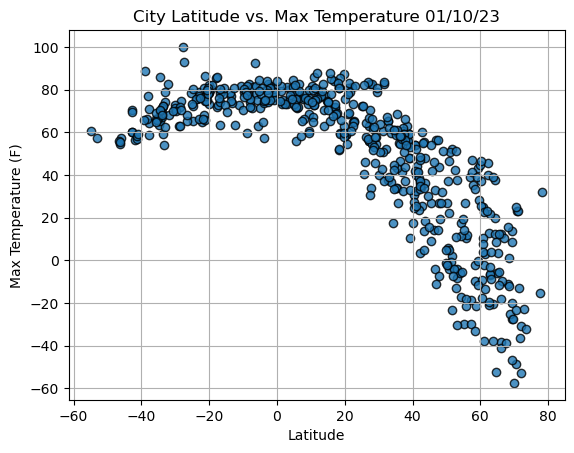

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

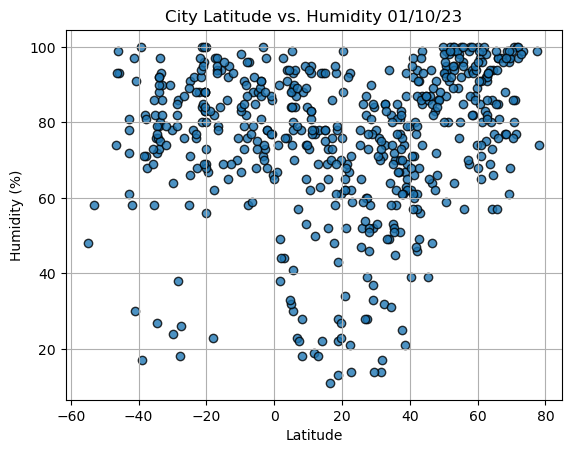

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

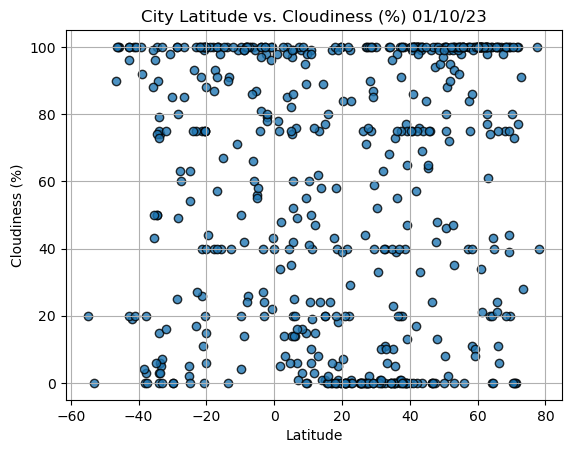

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

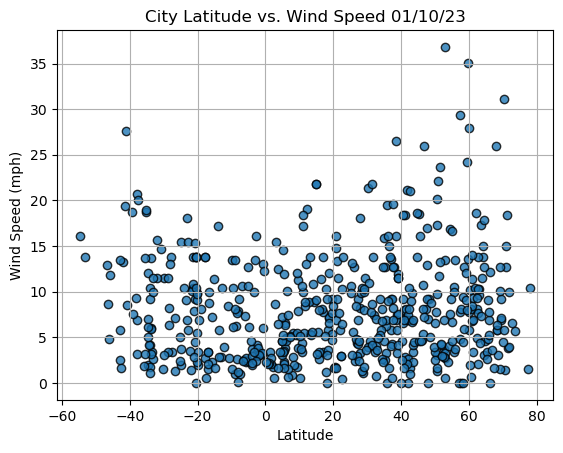

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
#show

In [32]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2023-01-10 21:32:13
Lat                        -53.15
Lng                      -70.9167
Max Temp                    57.31
Humidity                       58
Cloudiness                      0
Wind Speed                   13.8
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
549    False
550     True
551    False
552     True
553     True
Name: Lat, Length: 554, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2023-01-10 21:32:08,22.0752,-159.3190,81.10,67,20,5.75
1,Laramie,US,2023-01-10 21:32:08,41.3114,-105.5911,43.95,60,100,18.41
2,Xam Nua,LA,2023-01-10 21:32:08,20.4197,104.0439,58.46,99,84,1.77
4,Leningradskiy,RU,2023-01-10 21:32:09,69.3833,178.4167,-20.18,97,39,9.24
9,Mahibadhoo,MV,2023-01-10 21:32:11,3.7833,72.9667,80.19,76,85,12.46


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

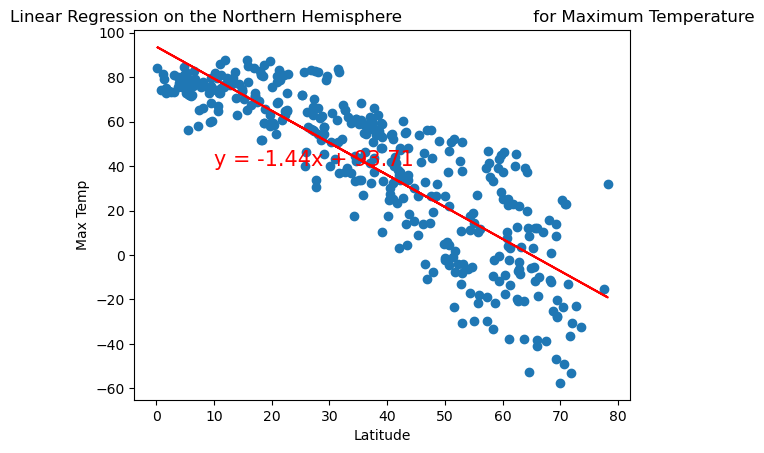

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

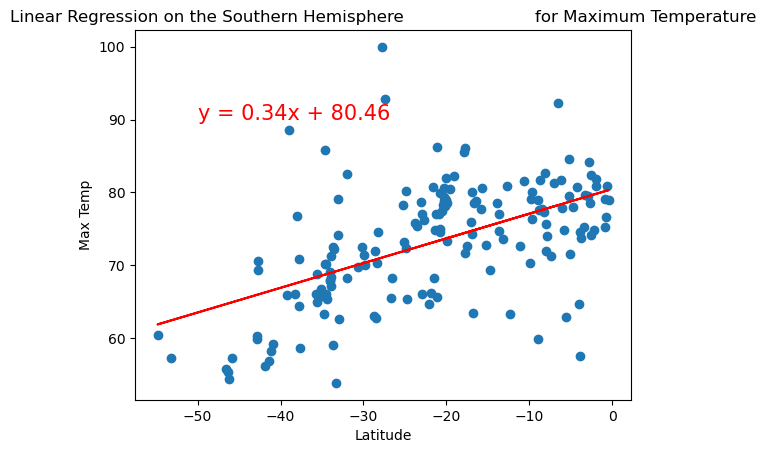

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

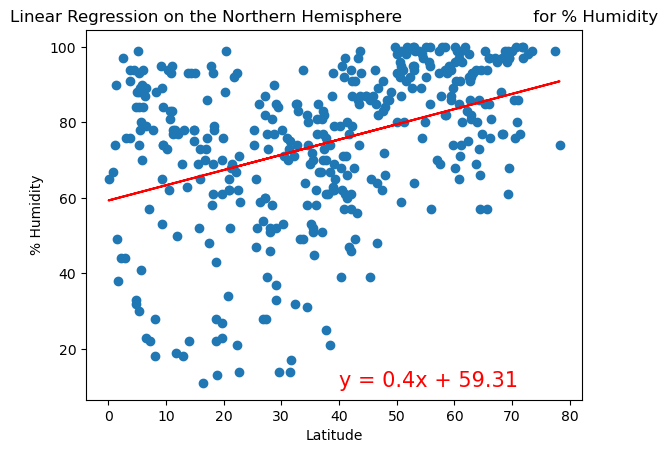

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

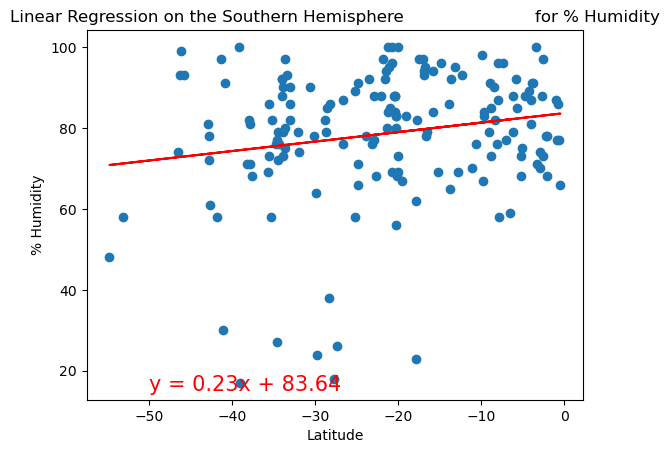

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

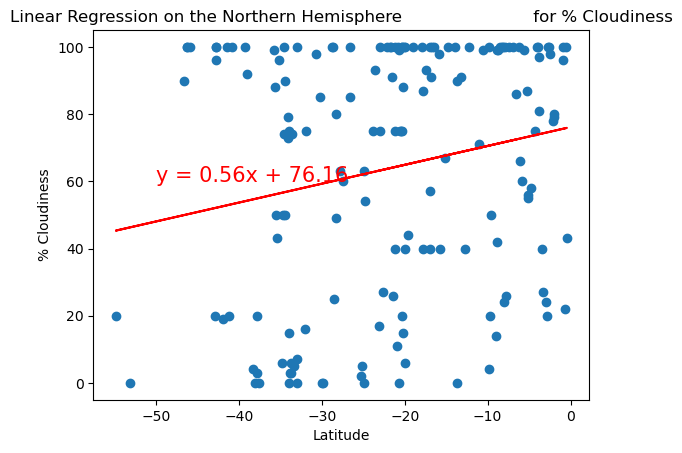

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

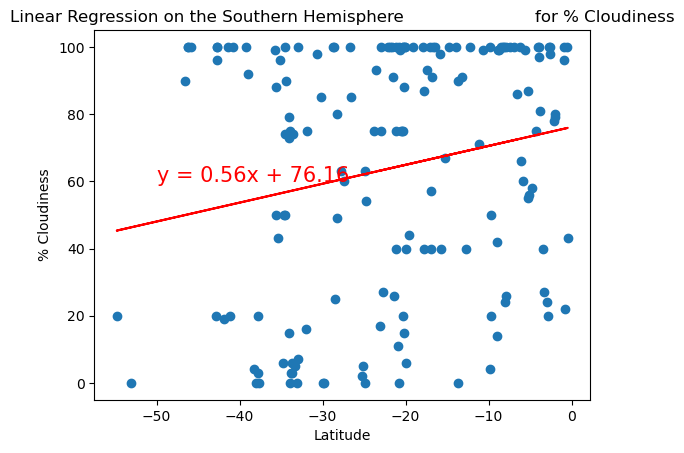

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

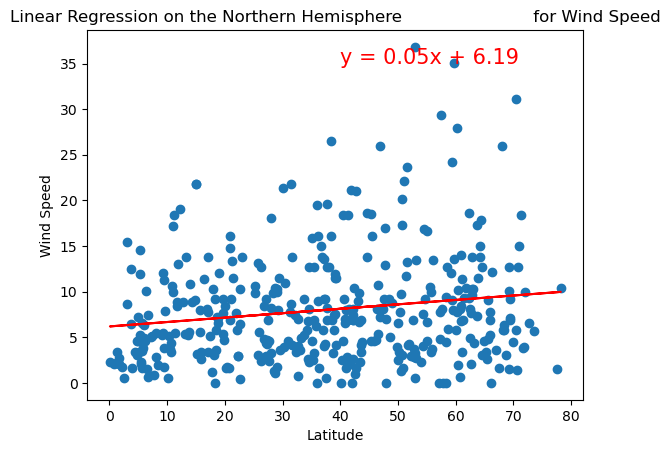

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

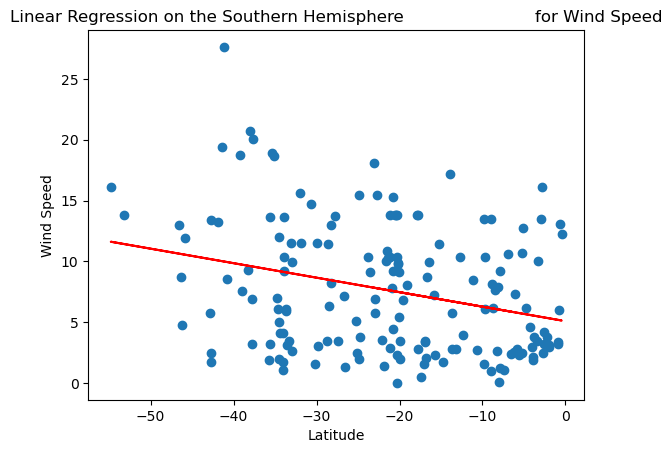

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))